# Troubleshooting errors and FAQs

This notebook covers some common questions and problems that people may encouter while following the material in the Kaggle 5-day Generative AI intensive course. It is not intended to be part of the coursework but please check here for your problem before asking in the Discord or posting elsewhere.

## FAQs

### How do I submit the coursework?

You don't need to! To receive the course badge, you only need to submit the *capstone project* that will be announced on Friday (4/4).

The capstone project will use knowledge you learn from the codelabs, so we recommend running through them all, but you don't have to submit anything directly from the codelabs, and it's OK if you used a different email to sign up to the course.

### How long do I have to do the coursework?

You are encouraged to do the coursework on the day it is released, as this allows you to ask questions that may be answered in the livestream, and get help from others that are focused on the same problems, but you are not required to do this. The coursework is not planned to be removed so you can go at your own pace. You can download the PDFs too, so you can read them offline at any time.

### I've done everything for today, what can I do next?

The main thing you can do is to read the whitepaper you were sent, or listen to the podcast version of it. If you've done that and are looking for extension work, check out the recommendations at the end of each codelab. You can also find more codelabs in the [Gemini API Cookbook](https://github.com/google-gemini/cookbook), as well as the [Gemini API documentation site](https://ai.google.dev/gemini-api).

### Will I get charged for using this API key?

By default, AI Studio will set you up on the free tier. You can check which tier your key is on through the [API key page in AI Studio](https://aistudio.google.com/app/apikey). You may be on a pay-as-you-go tier if you added a key to a Google Cloud project that already has billing enabled. To make it free, you can create a new project, do not set up billing (or remove it in the Cloud Console), and create the API key in that project.

See [the billing docs](https://ai.google.dev/gemini-api/docs/billing) for more information on how to enable or disable billing.

This is what the free/paid options look like in AI Studio:

![](https://storage.googleapis.com/generativeai-downloads/kaggle/ais_key2.png)


## Errors

### This phone number can't be verified on Kaggle

If you are getting an error when trying to verify your phone number on Kaggle, ensure your phone is not signed up for the Do-Not-Call registry and double check your country code and area code are entered correctly. Ensure your phone number is not from a region sanctioned by the US government. If you are still having issues contact Kaggle support by filling out the form here: https://www.kaggle.com/contact#/account/activate/phone
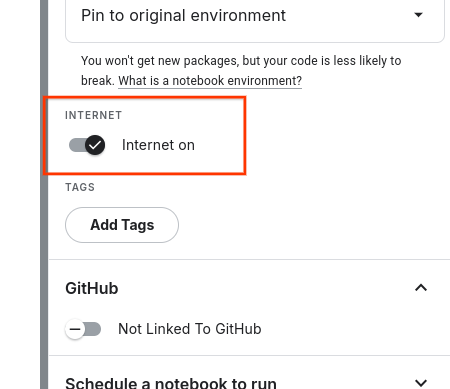
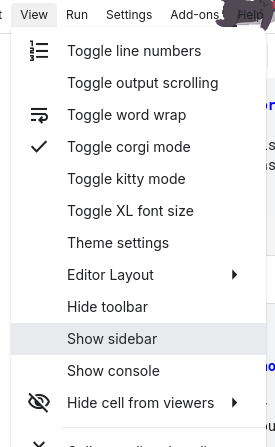

### No internet access

This error may manifest in a number of ways. Here are some examples:

* When accessing a Kaggle secret: `ConnectionError: Connection error trying to communicate with service`
* When running pip install: `HTTPSConnection ...: Failed to establish a new connection: \[Errno -3] Temporary failure in name resolution'`
* `TransportError: Failed to retrieve http://metadata.google.internal/computeMetadata/v1/universe/universe_domain from the Google Compute Engine metadata service`
* `400 Use of API-based models is not allowed for Internet-disabled notebooks`

You can confirm that you have this error by creating a new code cell in the affected notebook and running this code:

```bash
!curl ipinfo.io
```

If you see `curl: (6) Could not resolve host: ipinfo.io`, then your notebook does not have internet access.

#### Possible causes

* Make sure you are signed in to Kaggle
* Make sure your phone number is verified in your Kaggle account at kaggle.com/settings.

    ![phone verify](https://storage.googleapis.com/kaggle-media/Images/5dgai_0.png)

* Make sure the notebook has internet enabled:
  * Find the switch by turning on the notebook sidebar
    
    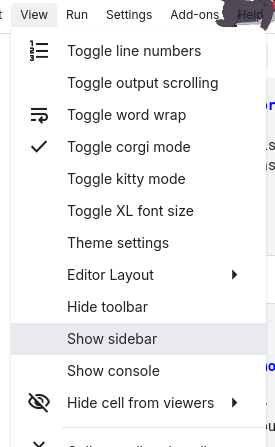

  * Then find this button in the sidebar
    
    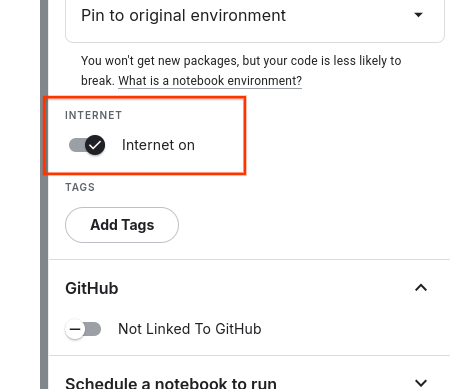

* If `!curl ipinfo.io` still fails, you may need to refresh your browser tab and wait a few minutes.
* Or, if you've done everything above, try a **🔁 Factory reset** of the notebook. If the factory reset works, please report this on Discord.

### ResourceExhausted: 429 Resource has been exhausted

Each Gemini API mode has a dedicated per-minute quota. You can find the details for each model on the [Pricing page](https://ai.google.dev/gemini-api/docs/rate-limits). When you exceed this limit within a 60-second window, you will see the `ResourceExhausted` error.

To fix it, you can wait up to 60 seconds and retry your request. To fix it in code you can try a few things.

1. **Edit the prompt**

Over-use of specific prompts can sometimes cause throttling. Try changing the words in the prompt slightly and try again.  e.g. `Pick a random colour... (respond in a single word)` can change to `Pick a random colour... (give me a single word)`

2. **Set up a retry policy**.

You can wrap calls to `generate_content` with a retry decorator.

```python
from google.api_core import retry

is_retriable = lambda e: (isinstance(e, genai.errors.APIError) and e.code in {429, 503})

@retry.Retry(predicate=is_retriable)
def generate_content(**kwargs):
  return client.models.generate_content(**kwargs)

generate_content(model=..., contents=...)
```

The retry policy has a number of parameters, e.g.

```python
from google.api_core import retry

@retry.Retry(
    predicate=is_retriable,
    initial=10,      # Number of seconds to delay first retry (default 1.0)
    multiplier=1.2,  # Factor to increase the delay each retry (default 2.0)
    timeout=300)     # Total retry duration in seconds (default 120.0)
}
def generate_content(...):
    ...
```

Read more in the [Error handling guide](https://github.com/google-gemini/cookbook/blob/main/quickstarts/Error_handling.ipynb).

3. **Enable billing**

If you wish, you can enable billing to enable the paid tier of quota. Be sure to read the [pricing page](https://ai.google.dev/gemini-api/docs/pricing) to find out how much it costs, the [rate limits page](https://ai.google.dev/gemini-api/docs/rate-limits) to see the limits, and the [billing page](https://ai.google.dev/gemini-api/docs/billing) for details on how to turn billing on or off.

Note that billing is not required for this course, but if you wish to use higher quota, this is one way of doing so.


### API keys

#### Get an API key

Open the API key page in AI Studio: https://aistudio.google.com/apikey

![](https://storage.googleapis.com/generativeai-downloads/kaggle/ais_key1.png)

#### Add your API key to the notebook

To use your API key, you add it to your Kaggle Notebook as a Kaggle User Secret.

![](https://storage.googleapis.com/kaggle-media/Images/5dgai_1.png)
![](https://storage.googleapis.com/kaggle-media/Images/5dgai_2.png)
![](https://storage.googleapis.com/kaggle-media/Images/5dgai_3.png)
![](https://storage.googleapis.com/kaggle-media/Images/5dgai_4.png)



### InvalidArgument or invalid API key

This may happen if you have copied only part of the API key, or copied some extra characters. **After running the Secrets cell**, add a new code cell and run this:

```python
print(f'{len(GOOGLE_API_KEY)=}, {GOOGLE_API_KEY[:4]=}, {GOOGLE_API_KEY[-4:]=}')
>>> len(GOOGLE_API_KEY)=39, GOOGLE_API_KEY[:4]='AIza', GOOGLE_API_KEY[-4:]='7E14'
```

The output should be similar to the above. The first 4 characters will be `AIza`, the last four could be any alphanumeric characters, and the length should be around 35-40 characters. If you have anything different, follow the steps above to add your API key from AI Studio to Kaggle Secrets again.

### Note: you may need to restart the kernel to use updated packages

This is an informative note. You do not need to restart the kernel as a result of any `pip install` steps in this course. If you hit an error that is not covered here already, you can restart the kernel by choosing `Run` -> `Restart & clear cell outputs`, or try a **🔁 Factory reset**.

### Could not find a version that satisfies the requirement google-genai==1.7.0

This can be caused by running a notebook that does not have internet enabled. Check the "No internet access" section above. If that doesn't work, try a **🔁 Factory reset**.

### WARNING: Skipping jupyterlab as it is not installed.

This is just a warning. It happened because you ran `pip uninstall` more than once. The first time it ran, it ran successfully, the second time it ran, it had nothing to uninstall so it produced this error.

Nothing is wrong, you can continue on with the codelab.